In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

In [2]:
import h5py

In [3]:
from scipy.constants import e, m_p, c, epsilon_0

In [7]:
import sys, os
sys.path = ["/home/HPC/oeftiger/PyHEADTAIL_py3/python3/PyHEADTAIL/", 
            "/home/HPC/oeftiger/PyHEADTAIL_py3/"] + sys.path

import pickle

In [54]:
# from PyHEADTAIL.trackers.rf_bucket import RFBucket

In [85]:
def add_xy_legend():
    ylims = plt.ylim()
    plt.twinx()
    plt.plot([0, 5000], [0, 0], color='gray', ls='solid', label='$\epsilon_{rms,x}$')
    plt.plot([0, 5000], [0, 0], color='gray', ls='--', label='$\epsilon_{rms,y}$')
    plt.ylim(ylims)
    ax2.get_xaxis().set_visible(False)
    plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True, labelleft=False)
    plt.grid(False)
    # ax2.get_yaxis().set_visible(False)
    plt.legend(loc=2)

# matched vs. non-matched longitudinal momentum

In [8]:
(rec_epsn_x_unmatched, rec_epsn_y_unmatched, rec_epsn100_x_unmatched, rec_epsn100_y_unmatched) = np.load(
    '008_bunch_fast-sync-motion_3D-PIC/syncmot3DPIC_1e6mp_results_epsnxy.npy')

with h5py.File('011_bunch_fast-sync-motion_3D-PIC_smaller-sigmadp/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_matched = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_matched = np.array(fb['Bunch']['epsn_y'])

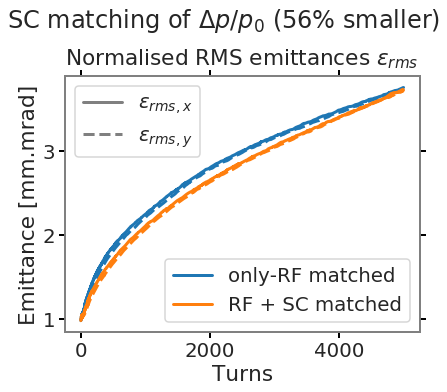

In [86]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_unmatched * 1e6, label=r'only-RF matched')
plt.plot(rec_epsn_y_unmatched * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_matched * 1e6, label=r'RF + SC matched', color='C1')
plt.plot(rec_epsn_y_matched * 1e6, color='C1', ls='--')

plt.legend()
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle('SC matching of $\Delta p/p_0$ (56% smaller)', fontsize=24, y=1.08)
plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_matched_unmatched_dp.png', dpi=150, bbox_inches='tight')

$\implies$ RF matching leads to $\sigma_\delta = 4.4\times 10^{-3}$ while SC potential well distortion leads to a matched $\sigma_\delta = 2.5\times 10^{-3}$

# long. SC matched vs. Ji's distribution

In [100]:
# (rec_epsn_x_Ji, rec_epsn_y_Ji, _, _) = np.load(
#     '009_bunch_fast-sync-motion_3D-PIC_with-Jis-distr/syncmot3DPIC_1e6mp_results_epsnxy.npy')
with h5py.File('009_bunch_fast-sync-motion_3D-PIC_with-Jis-distr/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_Ji = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_Ji = np.array(fb['Bunch']['epsn_y'])
    
with h5py.File('011_bunch_fast-sync-motion_3D-PIC_smaller-sigmadp/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_matched = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_matched = np.array(fb['Bunch']['epsn_y'])

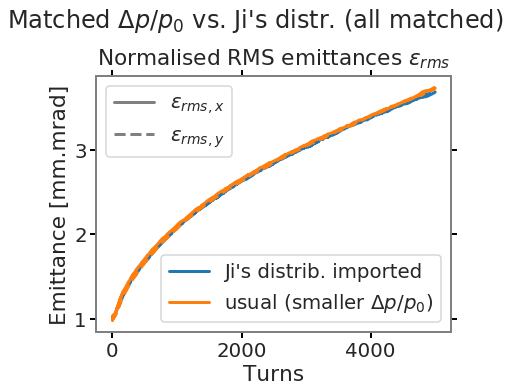

In [101]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_Ji * 1e6, label=r"Ji's distrib. imported")
plt.plot(rec_epsn_y_Ji * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_matched * 1e6, label=r'usual (smaller $\Delta p/p_0$)', color='C1')
plt.plot(rec_epsn_y_matched * 1e6, color='C1', ls='--')

plt.legend()
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle('Matched $\Delta p/p_0$ vs. Ji\'s distr. (all matched)', fontsize=24, y=1.08)
plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_matched_dp_vs_Ji.png', dpi=150, bbox_inches='tight')

# non-linear vs. linear synchrotron motion

In [27]:
with h5py.File('011_bunch_fast-sync-motion_3D-PIC_smaller-sigmadp/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_nonlinear = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_nonlinear = np.array(fb['Bunch']['epsn_y'])

(rec_epsn_x_linear, rec_epsn_y_linear, _, _) = np.load(
    '012_bunch_fast-LINEAR-sync-motion_3D-PIC_smaller-sigmadp/syncmot3DPIC_1e6mp_results_epsnxy.npy')

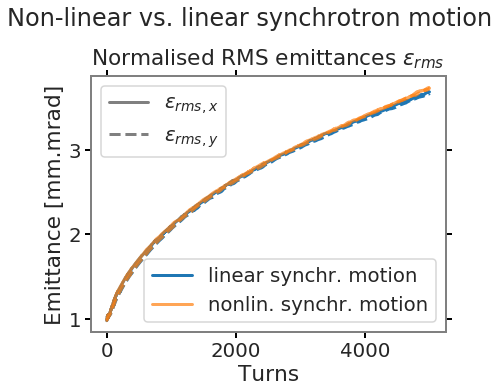

In [88]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_linear * 1e6, label=r"linear synchr. motion")
plt.plot(rec_epsn_y_linear * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_nonlinear * 1e6, label=r'nonlin. synchr. motion', color='C1', alpha=0.7)
plt.plot(rec_epsn_y_nonlinear * 1e6, color='C1', ls='--', alpha=0.7)

plt.legend()
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle('Non-linear vs. linear synchrotron motion', fontsize=24, y=1.08)
plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_nonlinear_vs_linear_synchrotron_motion.png', dpi=150, bbox_inches='tight')

# quadrupole model: 1 thin lens vs. 16 thin lenses

In [35]:
with h5py.File('011_bunch_fast-sync-motion_3D-PIC_smaller-sigmadp/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_1lens = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_1lens = np.array(fb['Bunch']['epsn_y'])

with h5py.File('013_bunch_fast-sync-motion_3D-PIC_many-thin-magnet-slices/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_16lenses = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_16lenses = np.array(fb['Bunch']['epsn_y'])

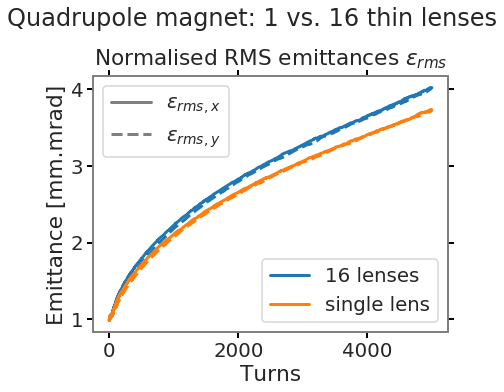

In [89]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_16lenses * 1e6, label=r"16 lenses")
plt.plot(rec_epsn_y_16lenses * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_1lens * 1e6, label=r'single lens', color='C1')
plt.plot(rec_epsn_y_1lens * 1e6, color='C1', ls='--')

plt.legend(loc=4)
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle('Quadrupole magnet: 1 vs. 16 thin lenses', fontsize=24, y=1.08)

plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_quadrupole_model_1_vs_16_lenses.png', dpi=150, bbox_inches='tight')

# Macro-particles impact

In [67]:
with h5py.File('013_bunch_fast-sync-motion_3D-PIC_many-thin-magnet-slices/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_1e6mp = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_1e6mp = np.array(fb['Bunch']['epsn_y'])

with h5py.File('014_same-as-013_8e6mp/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_8e6mp = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_8e6mp = np.array(fb['Bunch']['epsn_y'])

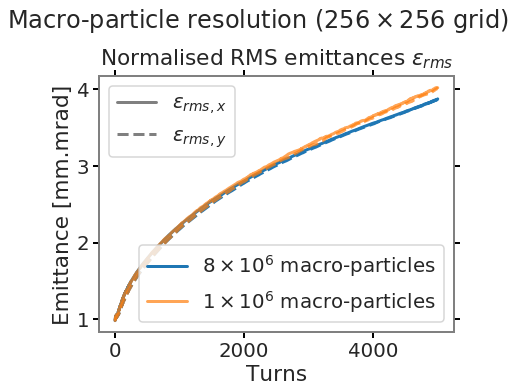

In [90]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_8e6mp * 1e6, label=r"$8\times 10^6$ macro-particles")
plt.plot(rec_epsn_y_8e6mp * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_1e6mp * 1e6, label=r'$1\times 10^6$ macro-particles', color='C1', alpha=0.7)
plt.plot(rec_epsn_y_1e6mp * 1e6, color='C1', ls='--', alpha=0.7)

plt.legend(loc=4)
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle(r'Macro-particle resolution ($256\times 256$ grid)', fontsize=24, y=1.08)

plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_macroparticlenumber.png', dpi=150, bbox_inches='tight')

# Number of SC nodes impact

In [70]:
with h5py.File('014_same-as-013_8e6mp/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_10scnodes = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_10scnodes = np.array(fb['Bunch']['epsn_y'])

with h5py.File('015_same-as-014_20-sc-nodes/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_20scnodes = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_20scnodes = np.array(fb['Bunch']['epsn_y'])

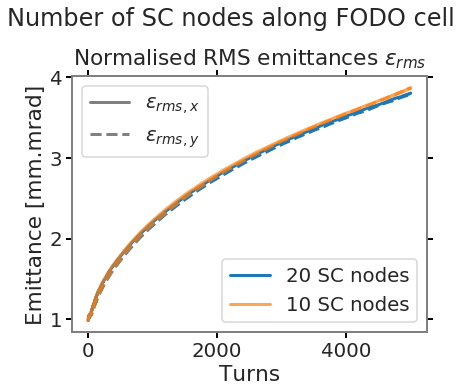

In [91]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_20scnodes * 1e6, label=r"20 SC nodes")
plt.plot(rec_epsn_y_20scnodes * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_10scnodes * 1e6, label=r'10 SC nodes', color='C1', alpha=0.7)
plt.plot(rec_epsn_y_10scnodes * 1e6, color='C1', ls='--', alpha=0.7)

plt.legend(loc=4)
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle(r'Number of SC nodes along FODO cell', fontsize=24, y=1.08)

plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_scnodes.png', dpi=150, bbox_inches='tight')

# Grid resolution impact

In [92]:
with h5py.File('015_same-as-014_20-sc-nodes/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_256x256 = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_256x256 = np.array(fb['Bunch']['epsn_y'])

with h5py.File('016_same-as-015_largergrid/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_512x512 = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_512x512 = np.array(fb['Bunch']['epsn_y'])

with h5py.File('017_same-as-013_smallergrid64x64/bunchmonitor.h5', 'r') as fb:
    rec_epsn_x_64x64 = np.array(fb['Bunch']['epsn_x'])
    rec_epsn_y_64x64 = np.array(fb['Bunch']['epsn_y'])

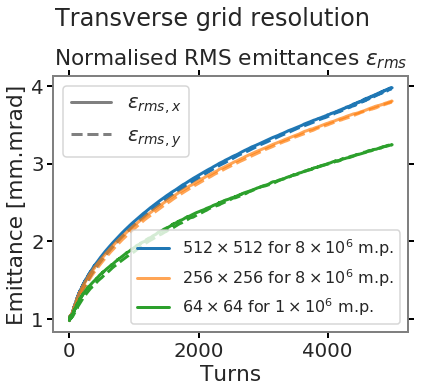

In [99]:
plt.figure(figsize=(6, 5))

plt.plot(rec_epsn_x_512x512 * 1e6, label=r"$512\times512$ for $8\times10^6$ m.p.")
plt.plot(rec_epsn_y_512x512 * 1e6, color='C0', ls='--')

plt.plot(rec_epsn_x_256x256 * 1e6, label=r'$256\times256$ for $8\times10^6$ m.p.', color='C1', alpha=0.7)
plt.plot(rec_epsn_y_256x256 * 1e6, color='C1', ls='--', alpha=0.7)

plt.plot(rec_epsn_x_64x64 * 1e6, label=r'$64\times64$ for $1\times10^6$ m.p.', color='C2')
plt.plot(rec_epsn_y_64x64 * 1e6, color='C2', ls='--')

plt.legend(loc=4, fontsize=16)
plt.xlabel('Turns')
plt.ylabel('Emittance [mm.mrad]')
plt.title('Normalised RMS emittances $\epsilon_{rms}$', y=1.02)
plt.suptitle(r'Transverse grid resolution', fontsize=24, y=1.08)

plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)
plt.tight_layout()

add_xy_legend()

plt.savefig('comparison_gridresolution.png', dpi=150, bbox_inches='tight')